Leitura dos dados da base SONDA 

In [1]:
import pandas as pd
import os
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import Measures

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics import tsaplots as tsp
from statsmodels.tsa.seasonal import seasonal_decompose
from pyFTS.benchmarks import ResidualAnalysis, Measures
from scipy.special import boxcox, inv_boxcox


/Users/cseveriano/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";", parse_dates=['date'])

joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";", parse_dates=['date'])

sbr_df = pd.read_csv('data/processed/SONDA/SBR-15min.csv', sep=";", parse_dates=['date'])

In [65]:
csk_index = []
df = fln_cs_df

for index, row in fln_test.iterrows():
    cs_irr = df.loc[(df['date'].dt.month==row.date.month) & (df['date'].dt.day==row.date.day) & (df['date'].dt.hour==row.date.hour) & (df['date'].dt.minute==row.date.minute)].glo_avg.values[0]
    csk_index.append(row.glo_avg / cs_irr)

    
clear_sky_index_df = pd.DataFrame({'date': fln_test.date,
                             'glo_avg': csk_index})

CS: -0.814818518519
Row -1.1067857142857145
CS: -0.814818518519
Row -1.2146666666666668
CS: -0.814818518519
Row -0.8789333333333332
CS: -0.814818518519
Row -0.802
CS: -0.814818518519
Row -0.7493333333333332
CS: -0.802643386243
Row -0.7836
CS: -0.814818518519
Row -0.8220000000000001
CS: -0.817655555556
Row -0.9702
CS: -0.828538888889
Row -0.9670666666666666
CS: -0.81982037037
Row -0.9570000000000004
CS: -0.812501851852
Row -0.9861333333333332
CS: -0.787185185185
Row -0.8864000000000001
CS: -0.748251851852
Row -0.7879999999999999
CS: -0.727940740741
Row -0.8061333333333331
CS: -0.7078
Row -0.8442000000000001
CS: -0.692661111111
Row -0.6586000000000001
CS: -0.681605555556
Row -0.8315333333333333
CS: -0.683338888889
Row -0.9326
CS: -0.688266666667
Row -0.8012666666666667
CS: -0.693914814815
Row -0.8261999999999999
CS: -0.707666666667
Row -0.8047333333333332
CS: -0.712216666667
Row -0.8241999999999998
CS: -0.737553703704
Row -0.8719333333333333
CS: -0.750962962963
Row -0.7956666666666667
CS

In [39]:
fln_test = fln_df[(fln_df.date >= '2014-11-01') & (fln_df.date <= '2014-11-30')]
joi_test = joi_df[(joi_df.date >= '2014-11-01') & (joi_df.date <= '2014-11-30')]
sbr_test = sbr_df[(sbr_df.date >= '2014-11-01') & (sbr_df.date <= '2014-11-30')]

#fln_test = fln_test.dropna(axis=0, how='any')

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


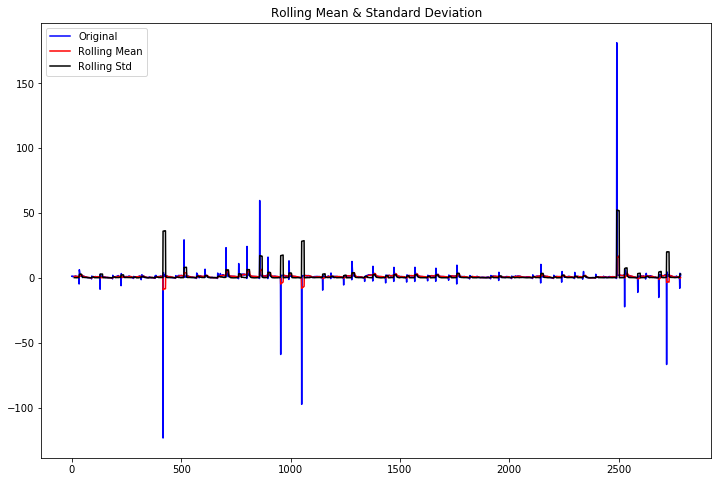

Results of Dickey-Fuller Test:
Test Statistic                  -51.982155
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2784.000000
Critical Value (1%)              -3.432701
Critical Value (5%)              -2.862579
Critical Value (10%)             -2.567323
dtype: float64


In [70]:
test_stationarity(clear_sky_index_df.glo_avg.values)

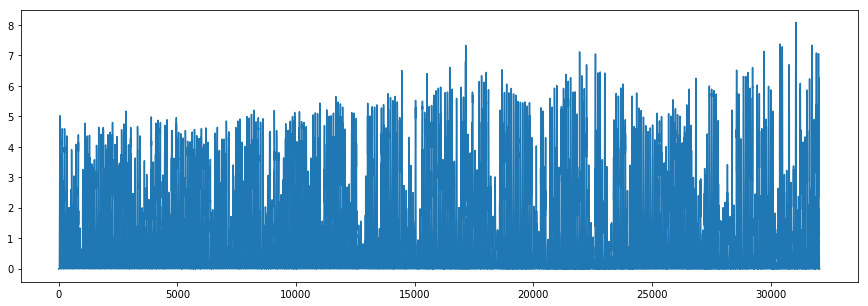

In [39]:
trend_irr = decomposition.trend

detrend_irr = irradiance / trend_irr
detrend_irr = detrend_irr[~np.isnan(detrend_irr)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
axes.plot(detrend_irr)

In [67]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


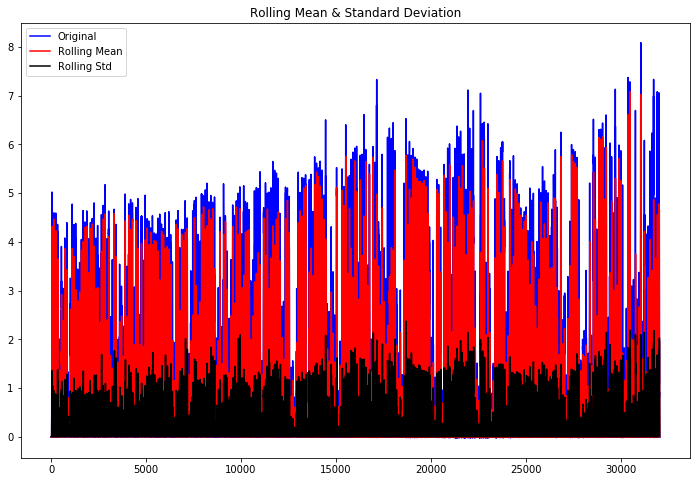

Results of Dickey-Fuller Test:
Test Statistic                   -38.859640
p-value                            0.000000
#Lags Used                        51.000000
Number of Observations Used    32003.000000
Critical Value (1%)               -3.430554
Critical Value (5%)               -2.861630
Critical Value (10%)              -2.566818
dtype: float64


In [40]:
test_stationarity(detrend_irr)

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


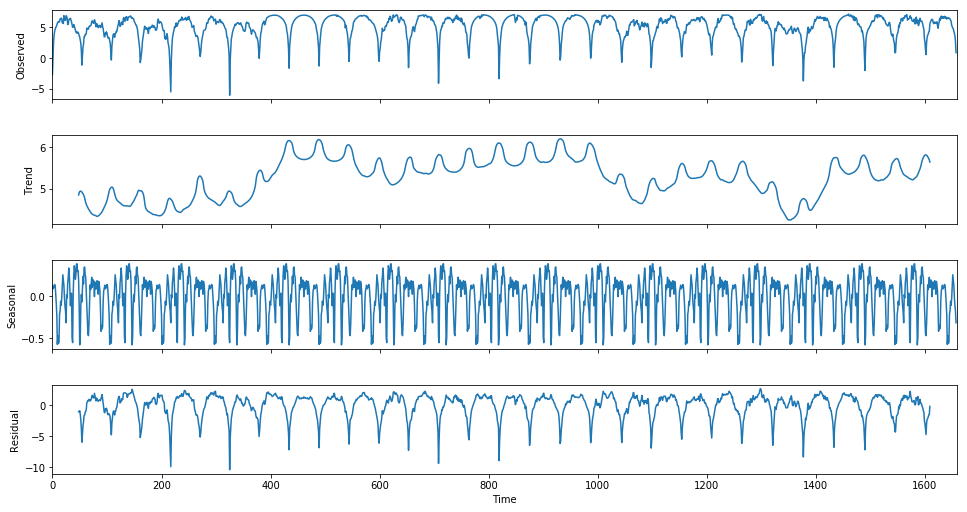

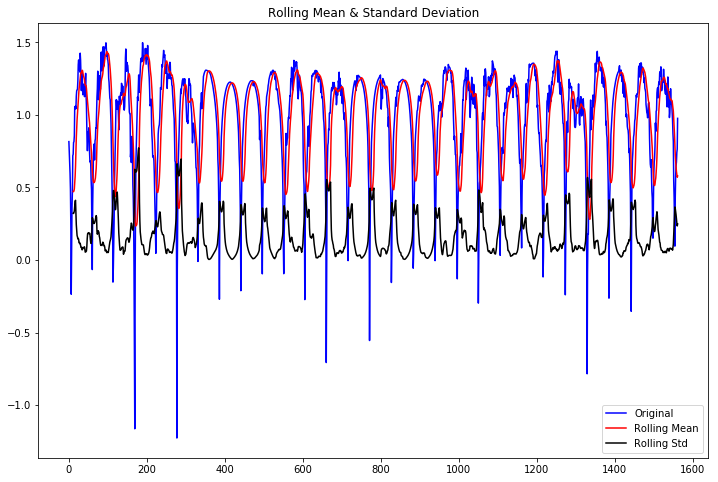

Results of Dickey-Fuller Test:
Test Statistic                -1.160304e+01
p-value                        2.620795e-21
#Lags Used                     2.400000e+01
Number of Observations Used    1.537000e+03
Critical Value (1%)           -3.434612e+00
Critical Value (5%)           -2.863422e+00
Critical Value (10%)          -2.567772e+00
dtype: float64


In [42]:
from scipy.ndimage.interpolation import shift

#diff_ir = irradiance_month - shift(irradiance_month, 1)
diff_ir = np.log(irradiance_month)
diff_ir = diff_ir[~np.isnan(diff_ir)]
decomposition = seasonal_decompose(diff_ir, freq=96)  

trend_irr = decomposition.trend

detrend_irr = diff_ir / trend_irr
detrend_irr = detrend_irr[~np.isnan(detrend_irr)]

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

test_stationarity(detrend_irr)

In [17]:
def ts_diagnostics(y, lags=None, title='', filename=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = pd.rolling_mean(y, window=12)
    rolling_std = pd.rolling_std(y, window=12)
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    tsp.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    tsp.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


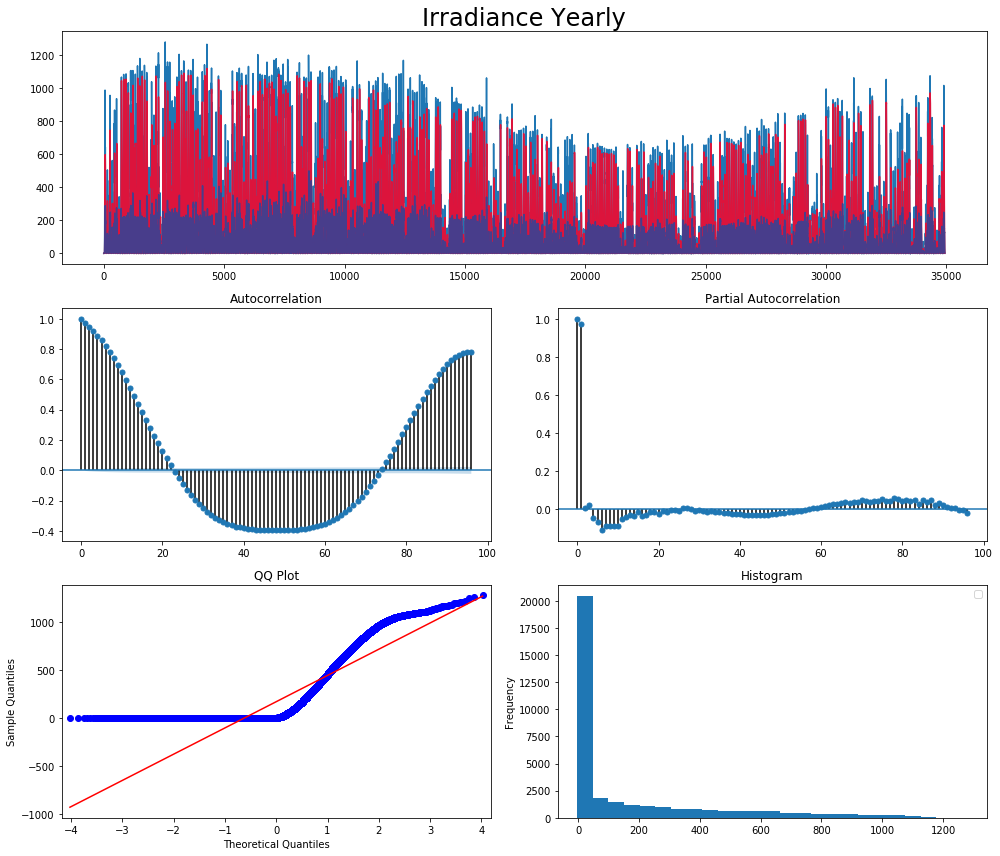

Results of Dickey-Fuller test:
test statistic            -36.579716
p-value                     0.000000
# of lags                  52.000000
# of observations       34882.000000
Critical Value (1%)        -3.430537
Critical Value (5%)        -2.861623
Critical Value (10%)       -2.566814
dtype: float64


In [18]:
ts_diagnostics(irradiance, lags=96, title="Irradiance Yearly")

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


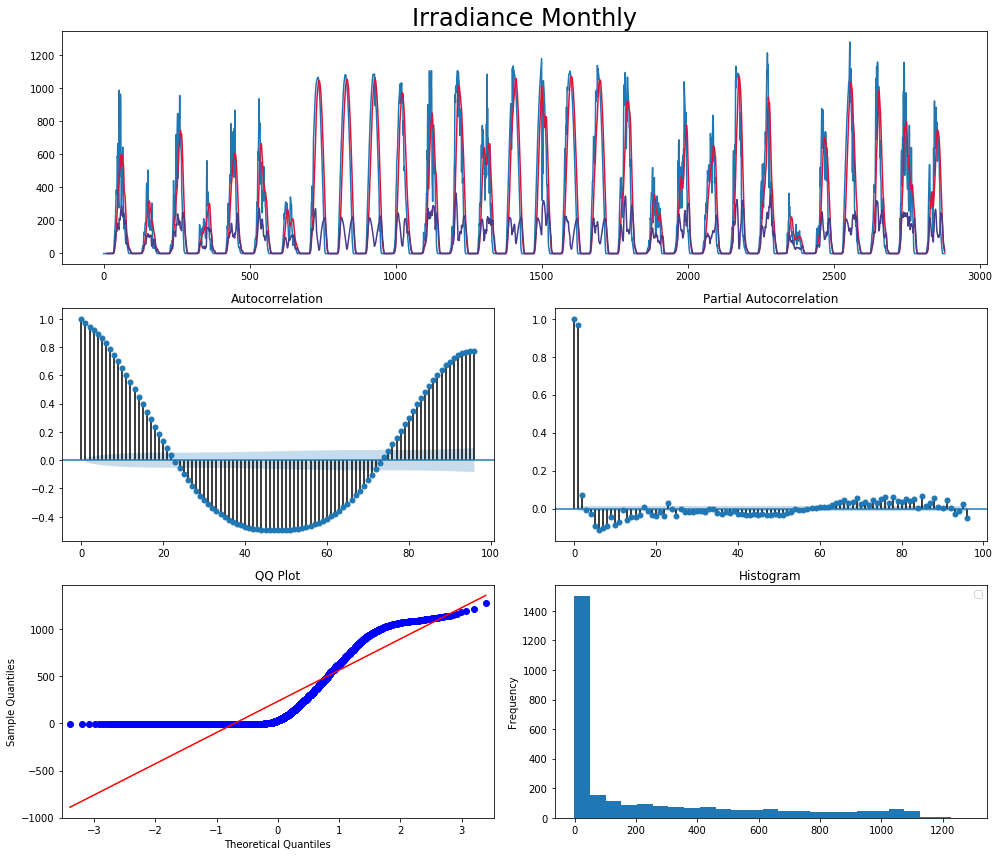

Results of Dickey-Fuller test:
test statistic         -1.100957e+01
p-value                 6.375706e-20
# of lags               2.200000e+01
# of observations       2.857000e+03
Critical Value (1%)    -3.432641e+00
Critical Value (5%)    -2.862552e+00
Critical Value (10%)   -2.567309e+00
dtype: float64


In [19]:
ts_diagnostics(irradiance_month, lags=96, title="Irradiance Monthly")

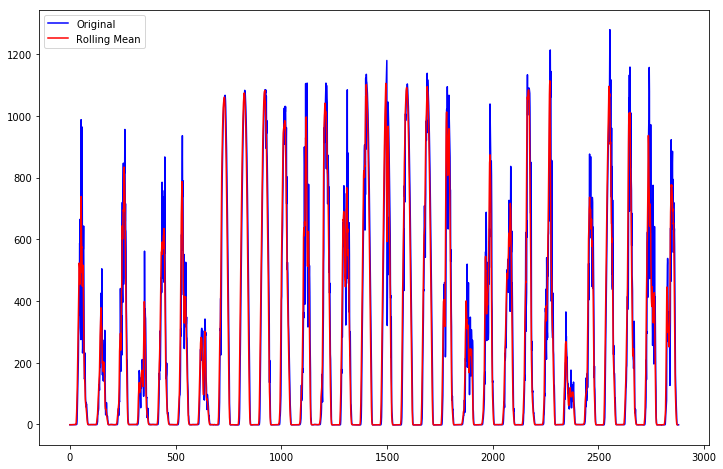

In [11]:
window_len = 6
w=np.ones(window_len,'d')

y=np.convolve(w/w.sum(),irradiance_month,mode='valid')

fig = plt.figure(figsize=(12, 8))
orig = plt.plot(irradiance_month, color='blue',label='Original')
mean = plt.plot(y, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.show()